In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
from google.colab import files

def preprocess_and_save_image(image_path, output_dir, target_size=(256, 256), blur_kernel_size=(5, 5)):
    os.makedirs(output_dir, exist_ok=True)

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    blurred_image = cv2.GaussianBlur(image, blur_kernel_size, 0)

    resized_image = cv2.resize(image, target_size)

    normalized_image = (resized_image - resized_image.min()) / (resized_image.max() - resized_image.min())

    output_path = os.path.join(output_dir, "preprocessed_image.png")
    cv2.imwrite(output_path, (normalized_image * 255).astype(np.uint8))

    print(f"Image preprocessed and saved as {output_path}")

if __name__ == "__main__":
    mri_path = "/content/drive/MyDrive/Project/Inputs/MRI/mri1.jpg"
    ct_path = "/content/drive/MyDrive/Project/Inputs/CT/ct1.jpg"


    preprocess_and_save_image(mri_path, "preprocessed_mri_image")

    preprocess_and_save_image(ct_path, "preprocessed_ct_image")


Image preprocessed and saved as preprocessed_mri_image/preprocessed_image.png
Image preprocessed and saved as preprocessed_ct_image/preprocessed_image.png


In [ ]:
!pip install pystackreg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.3/842.3 kB 7.7 MB/s eta 0:00:00


In [ ]:
from pystackreg import StackReg
from skimage import io
from matplotlib import pyplot as plt

In [ ]:
ref_img = io.imread("/content/preprocessed_ct_image/preprocessed_image.png")
offset_img = io.imread("/content/preprocessed_mri_image/preprocessed_image.png")

In [ ]:
print(ref_img.shape)
print(offset_img.shape)

(256, 256)
(256, 256)


In [ ]:
sr = StackReg(StackReg.SCALED_ROTATION)

reg_out = sr.register_transform(ref_img, offset_img)


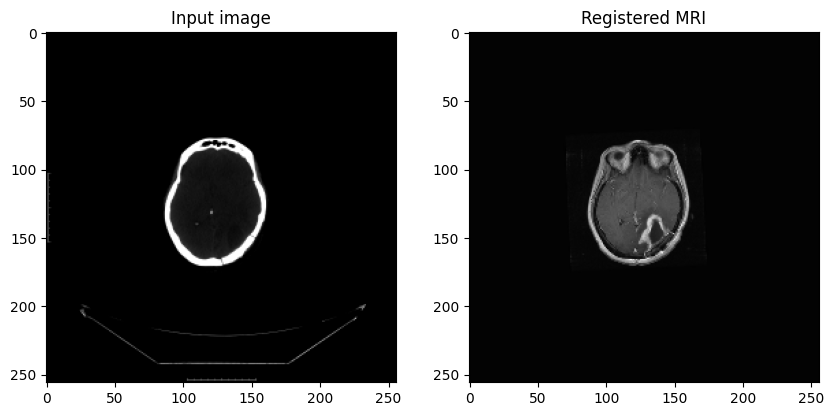

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(ref_img, cmap='gray')
ax1.title.set_text("Input image")

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(reg_out, cmap='gray')
ax2.title.set_text("Registered MRI")

In [ ]:
import cv2

save_mri = "/content/drive/MyDrive/Project/Inputs/MRI_REGISTERED/mri_registered1.jpg"
save_ct = "/content/drive/MyDrive/Project/Inputs/CT_pre-processed/ct1.jpg"

cv2.imwrite(save_mri, reg_out)
cv2.imwrite(save_ct, ref_img)

True